# Exploratory Analysis of Neuralink Compression Data

In [1]:
# Imported Libraries

from glob import glob
import IPython.display as ipd
import librosa 
import matplotlib.pyplot as plt

In [8]:
SAMPLE_RATE = 20000

In [2]:
data_dir = './data'
data_file_list = glob(data_dir + '/*.wav')

In [3]:
data_file_list[:5] # Listing the first 5 elements

['./data/102b47d9-371e-412a-8995-0dc6115ab2bb.wav',
 './data/2eef5d4d-93d1-4c0e-9d23-0989abaa34d0.wav',
 './data/fa2c5efb-cc0d-4292-ab99-91d345cf17d9.wav',
 './data/0458e9fc-6403-427e-afec-6a659104399a.wav',
 './data/30dee5fe-ded7-4978-9480-e40155e7b060.wav']

In [4]:
# Playing an audio sample
ipd.Audio(data_file_list[0])

In [9]:
# Loading the first sample
data, sample_rate = librosa.load(data_file_list[0], sr = SAMPLE_RATE)
print(f'Sample Rate: {sample_rate}')

Sample Rate: 20000


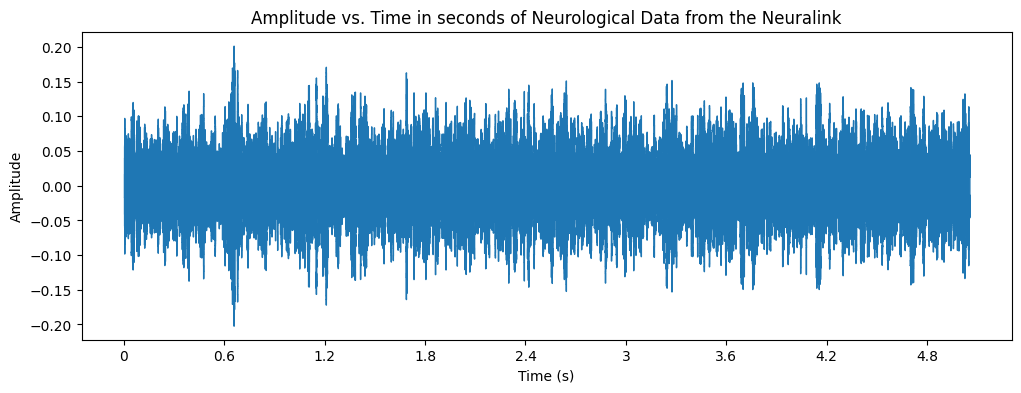

In [6]:
# Defining a figure that is 12 inches by 4 inches
plt.figure(figsize=(12, 4)) 
librosa.display.waveshow(data, sr=SAMPLE_RATE)
title = 'Amplitude vs. Time in seconds of Neurological Data from the Neuralink'
plt.title(title)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.show()

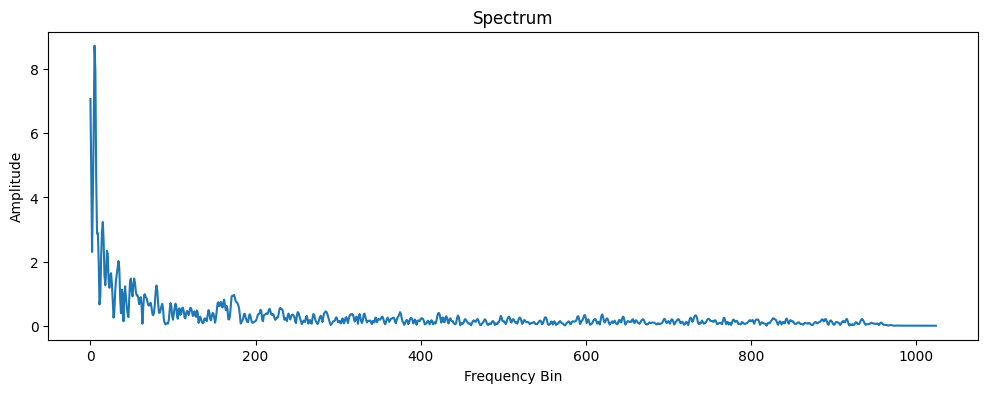

In [7]:
# Examining the frequency bins of the data
import numpy as np
import librosa
import matplotlib.pyplot as plt

n_fft = 2048
plt.figure(figsize=(12, 4))
ft = np.abs(librosa.stft(data[:n_fft], hop_length= n_fft +1))
plt.plot(ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.show()


## Filtering the signal to remove noise

In [10]:
def plot_neural_audio(data, sample_rate):
    """This function plots raw neural signal given data and a sample rate.

    Args:
        data (): _description_
        sample_rate (_type_): _description_
    """
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(data, sr=sample_rate)
    title = 'Amplitude vs Time in Seconds of Neural Data Audio'
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

## Exploring Sample #45


In [11]:
# There is an unusual audible sound in sample 44.
# I am exploring the data.

ipd.Audio(data_file_list[44])


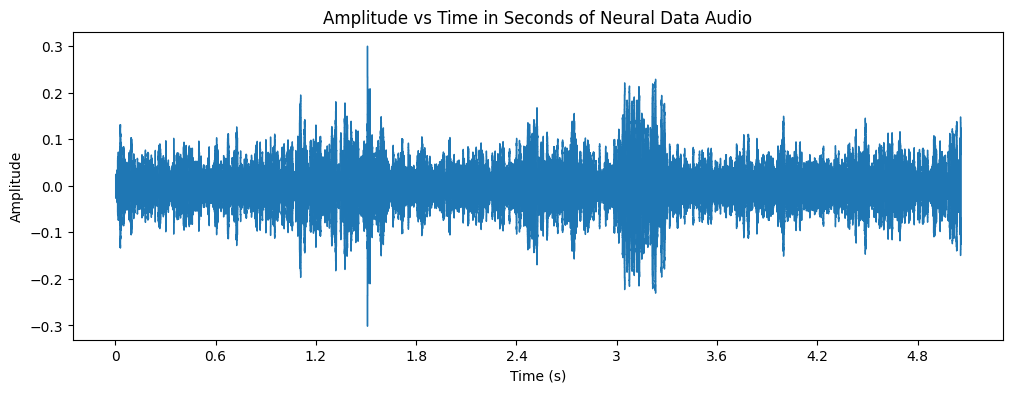

In [12]:
data, sample_rate = librosa.load(data_file_list[44], sr = SAMPLE_RATE)
plot_neural_audio(data, sample_rate)


## Exploratory Analysis of Sample #3 of the Neural Audio Data

In [45]:
ipd.Audio(data_file_list[2])

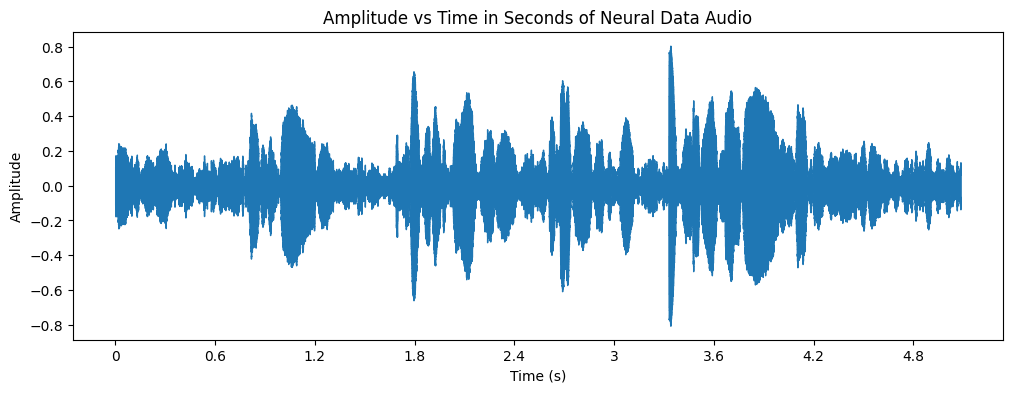

In [13]:
# Loading the data and plotting the waveform

data, sample_rate = librosa.load(data_file_list[2], sr = SAMPLE_RATE)
plot_neural_audio(data, sample_rate)

## Creating a Spectrogram Using the Examples from the Scipy Documentation

In [19]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()


In [20]:
# Generating a test signal: a 2 Vrms sine wave with a frequency of 3kHz
# This signal is corrupted by white noise which decays exponentially 
# and is sampled at 10kHz

fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

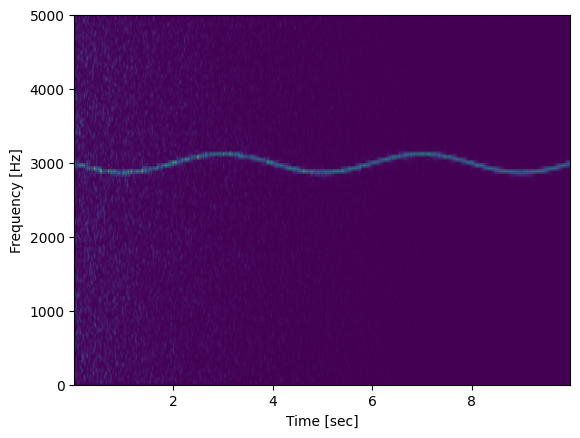

In [21]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
f